In [2]:
from scipy.stats import entropy
import math
def enthropy(class_a, class_b):
    if class_a != 0 and class_b != 0:
        operation1 = -1 * (class_a/(class_a+class_b)) * math.log((class_a/(class_a+class_b)),2)
        operation2 = -1 * (class_b/(class_a+class_b)) * math.log((class_b/(class_a+class_b)),2)
        return (operation1 + operation2)
    elif class_a == 0 and class_b != 0:
        operation1 = 0
        operation2 = -1 * (class_b/(class_a+class_b)) * math.log((class_b/(class_a+class_b)),2)
        return (operation1 + operation2)
    elif class_b == 0 and class_a != 0:
        operation1 = -1 * (class_a/(class_a+class_b)) * math.log((class_a/(class_a+class_b)),2)
        operation2 = 0
        return (operation1 + operation2)

In [3]:
# Initial enthropy
enthropy(9,11)

0.9927744539878084

In [4]:
# E for group_1, E for group_2
print(f"FIRST LAYER: LEAF 1: {enthropy(5,8)}, LEAF 2: {enthropy(6,1)}")

FIRST LAYER: LEAF 1: 0.961236604722876, LEAF 2: 0.5916727785823275


In [5]:
# IG for LAYER 1
enthropy(9,11) - (13/20)*enthropy(5,8) - (7/20)*enthropy(6,1)

0.16088518841412436

In [6]:
# E for group_1, E for group_2
print(f"FIRST LAYER: LEAF 1: {enthropy(5,8)}, LEAF 2: {enthropy(6,1)}")

FIRST LAYER: LEAF 1: 0.961236604722876, LEAF 2: 0.5916727785823275


In [7]:
# E for group_1, E for group_2
print(f"FIRST LAYER: LEAF 2: {(enthropy(5,4), enthropy(4,0))}, LEAF 2: {(enthropy(6,0), enthropy(1,0))}")

FIRST LAYER: LEAF 2: (0.9910760598382222, 0.0), LEAF 2: (0.0, 0.0)


In [8]:
enthropy(1,4), enthropy(4,0)

(0.7219280948873623, 0.0)

In [9]:
entropy([1, 4], base=2)

0.7219280948873623

In [10]:
enthropy(1,0), enthropy(4,0)

(0.0, 0.0)

In [11]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

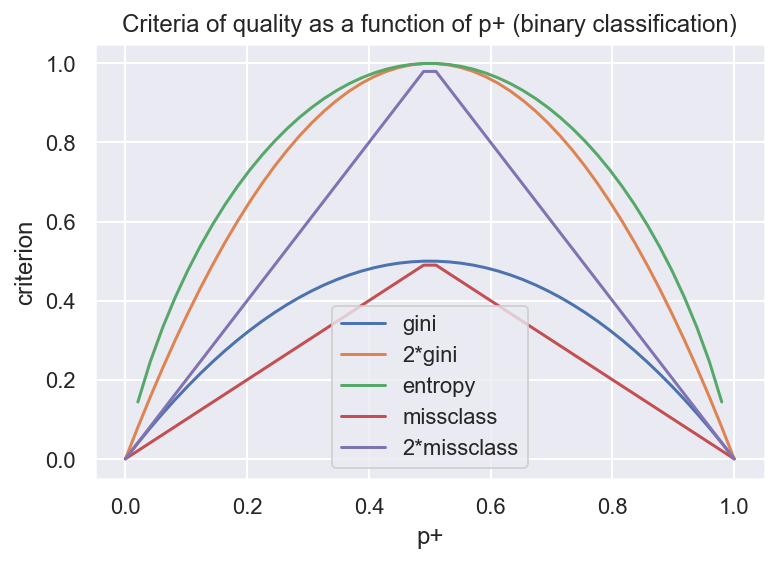

In [12]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

In [13]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [14]:
train_data.shape

(200, 2)

In [15]:
train_labels.shape

(200,)

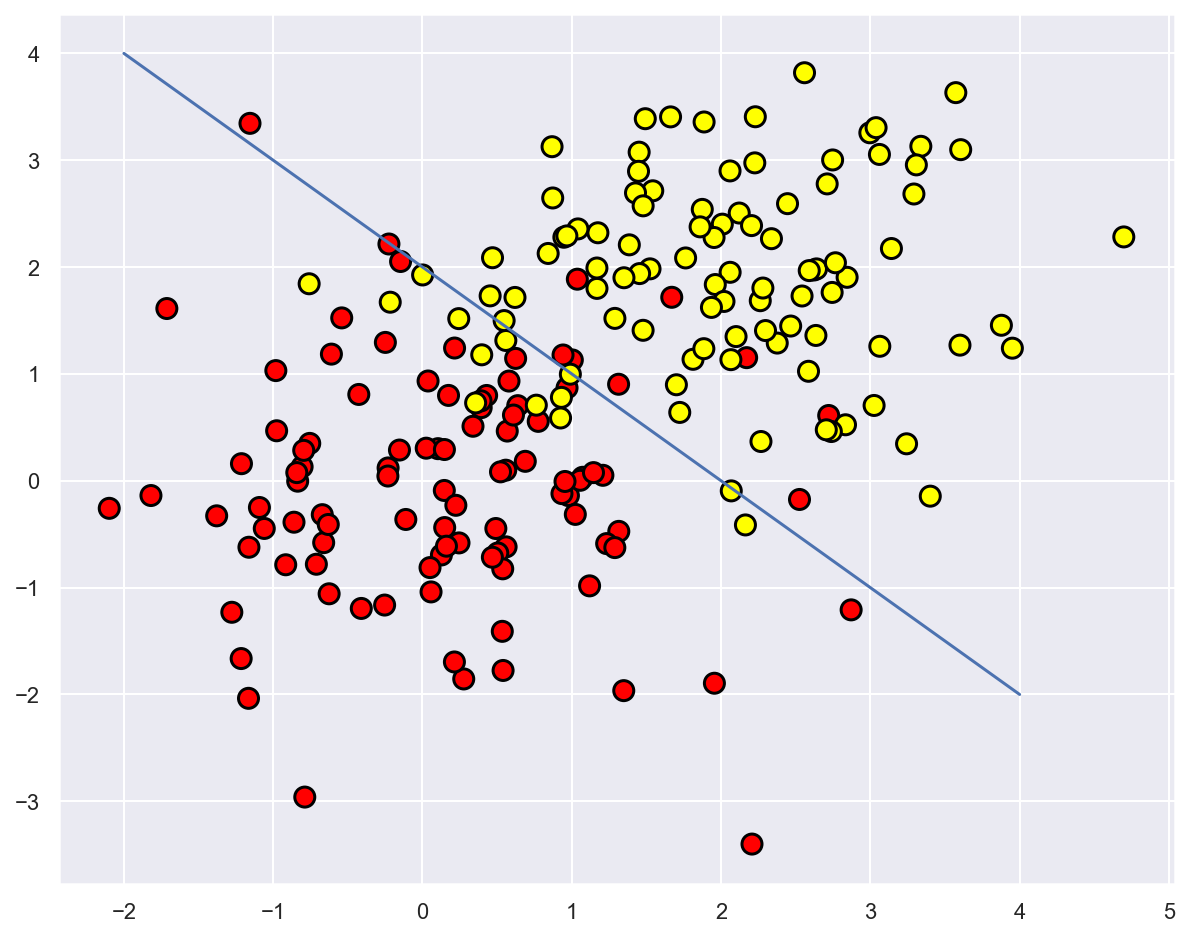

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

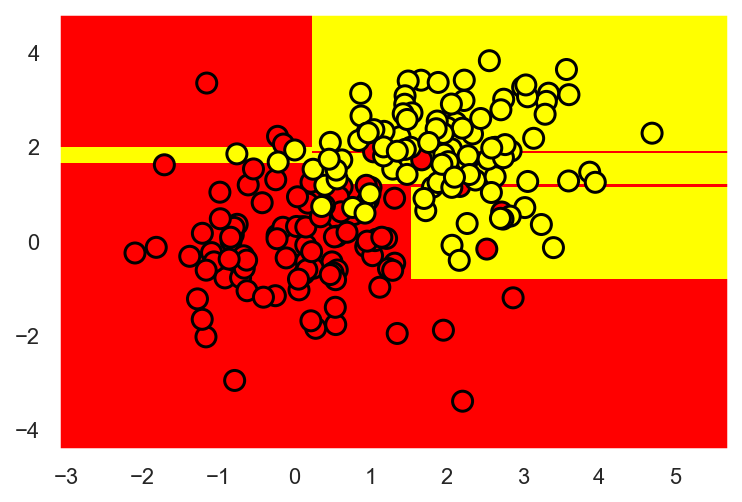

In [17]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

In [18]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

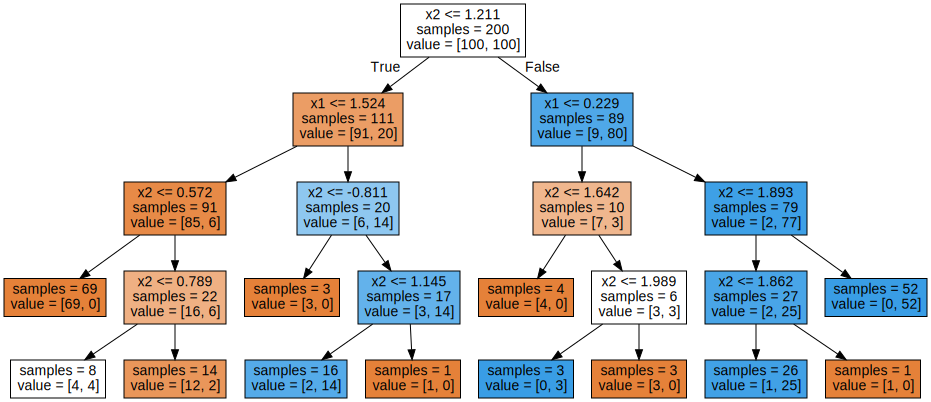

In [19]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, out_file="tree_class.dot", feature_names=['x1','x2'], impurity=False, filled=True)

import graphviz
with open("tree_class.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [20]:
# if u want save it as img
# tree_graph_to_png(
#     tree=clf_tree,
#     feature_names=["x1", "x2"],
#     png_file_to_save="C:/datasets/topic3_decision_tree3.png",
# )

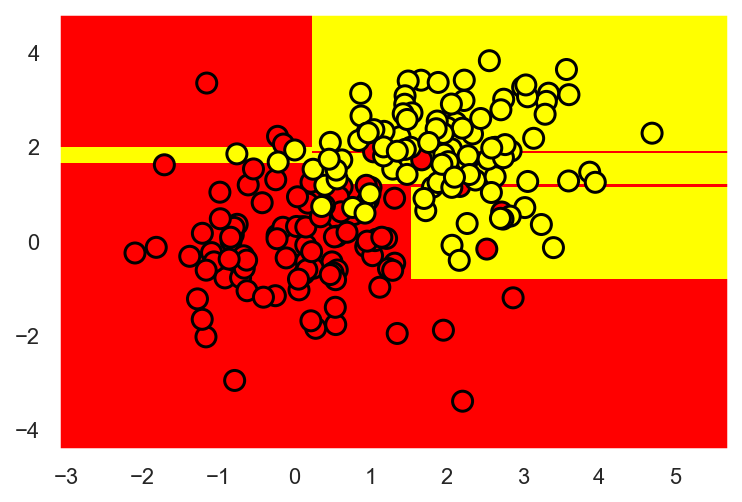

In [21]:
from sklearn.tree import DecisionTreeClassifier


# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


clf_tree = DecisionTreeClassifier(criterion="log_loss", max_depth=4, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

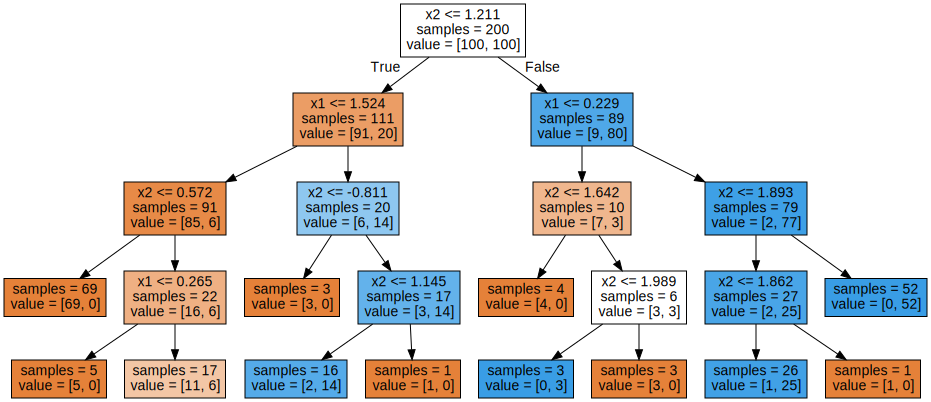

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, out_file="tree_class.dot", feature_names=['x1','x2'], impurity=False, filled=True)

import graphviz
with open("tree_class.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [23]:
train_data = pd.DataFrame(train_data)
train_labels = pd.DataFrame(train_labels)

In [24]:
train_data = pd.concat((train_data.rename(columns={0:'x1',1:'x2'}), train_labels), axis=1)

In [25]:
pd.set_option('display.max_rows', 200)
train_data = train_data.sort_values('x2').reset_index().drop('index', axis=1); train_data

,x1,x2,0
0,2.207016,-3.399931,0.0
1,-0.788470,-2.960123,0.0
2,-1.165373,-2.035995,0.0
3,1.348079,-1.964012,0.0
4,1.955275,-1.894791,0.0
5,0.276266,-1.854628,0.0
6,0.539840,-1.775282,0.0
7,0.213830,-1.695716,0.0
8,-1.214599,-1.663735,0.0
9,0.534451,-1.409031,0.0


In [26]:
(1.185404 + 1.236286)/2

1.210845

In [27]:
train_data.loc[0:110] # x2 <= 1.211

,x1,x2,0
0,2.207016,-3.399931,0.0
1,-0.788470,-2.960123,0.0
2,-1.165373,-2.035995,0.0
3,1.348079,-1.964012,0.0
4,1.955275,-1.894791,0.0
5,0.276266,-1.854628,0.0
6,0.539840,-1.775282,0.0
7,0.213830,-1.695716,0.0
8,-1.214599,-1.663735,0.0
9,0.534451,-1.409031,0.0


In [28]:
train_data.loc[111:] # x2 >= 1.211

,x1,x2,0
111,1.884550,1.236286,1.0
112,3.951040,1.241008,1.0
113,0.214866,1.242425,0.0
114,3.063131,1.258805,1.0
115,3.600060,1.269468,1.0
116,2.376192,1.288823,1.0
117,-0.248635,1.294970,0.0
118,0.558202,1.313195,1.0
119,2.100323,1.349604,1.0
120,2.635159,1.360101,1.0


In [29]:
from scipy.stats import entropy

In [30]:
entropy([80/89, 9/89], base=2)

0.4725472219330293

In [31]:
train_data2 = train_data.loc[0:110].sort_values('x1').reset_index().drop('index', axis=1)

In [32]:
train_data2

,x1,x2,0
0,-2.098126,-0.257774,0.0
1,-1.818812,-0.138049,0.0
2,-1.378602,-0.327981,0.0
3,-1.277143,-1.230688,0.0
4,-1.214599,-1.663735,0.0
5,-1.212560,0.159991,0.0
6,-1.165373,-2.035995,0.0
7,-1.162449,-0.621992,0.0
8,-1.092230,-0.250027,0.0
9,-1.059770,-0.446122,0.0


In [33]:
(1.348079 + 1.700675) / 2 

1.5243769999999999

In [34]:
train_data2[0].loc[0:90].sum()

6.0

In [35]:
train_data2[0].loc[0:90].count()

91

In [36]:
entropy([6/91, 85/91], base=2)

0.35056382068186565

In [37]:
train_data2[0].loc[91:].sum()

14.0

In [38]:
train_data2[0].loc[91:].count()

20

In [39]:
entropy([14/20, 6/20], base=2)

0.8812908992306927

In [40]:
train_data3 = train_data2.loc[0:90].sort_values('x2').reset_index().drop('index', axis=1)

In [41]:
(0.556003 + 0.587728) / 2

0.5718655

In [42]:
train_data3.loc[:68][0].sum()

0.0

In [43]:
train_data3.loc[:68][0].count()

69

In [44]:
train_data3.loc[69:][0].sum()

6.0

In [45]:
train_data3.loc[69:][0].count()

22

In [46]:
entropy([0/69,69/69], base=2)

0.0

In [47]:
entropy([6/22,16/22], base=2)

0.8453509366224364

In [48]:
train_data4 = train_data3.loc[69:].sort_values('x1').reset_index().drop('index', axis=1)

In [49]:
train_data4.loc[5:][0].sum()

6.0

In [50]:
train_data4.loc[5:][0].count()

17

In [51]:
entropy([6/17,11/17], base=2)

0.9366673818775625

In [52]:
train_data = pd.concat((train_data.rename(columns={0:'x1',1:'x2'}), train_labels), axis=1)

In [53]:
train_data = train_data.rename(columns={0:'label'})

In [54]:
train_gini1 = train_data.sort_values('x2').reset_index().drop('index', axis=1)

In [55]:
train_gini1.loc[:110]['label'].sum()

11.0

In [56]:
train_gini1.loc[:110]['label'].count()

111

In [57]:
1 - (20/111)**2 - (91/111)**2

0.29543056570083603

In [58]:
train_gini1.loc[110:]['label'].sum()

90.0

In [59]:
train_gini1.loc[110:]['label'].count()

90

In [60]:
1 - (9/89)**2 - (80/89)**2

0.18179522787526836

In [294]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

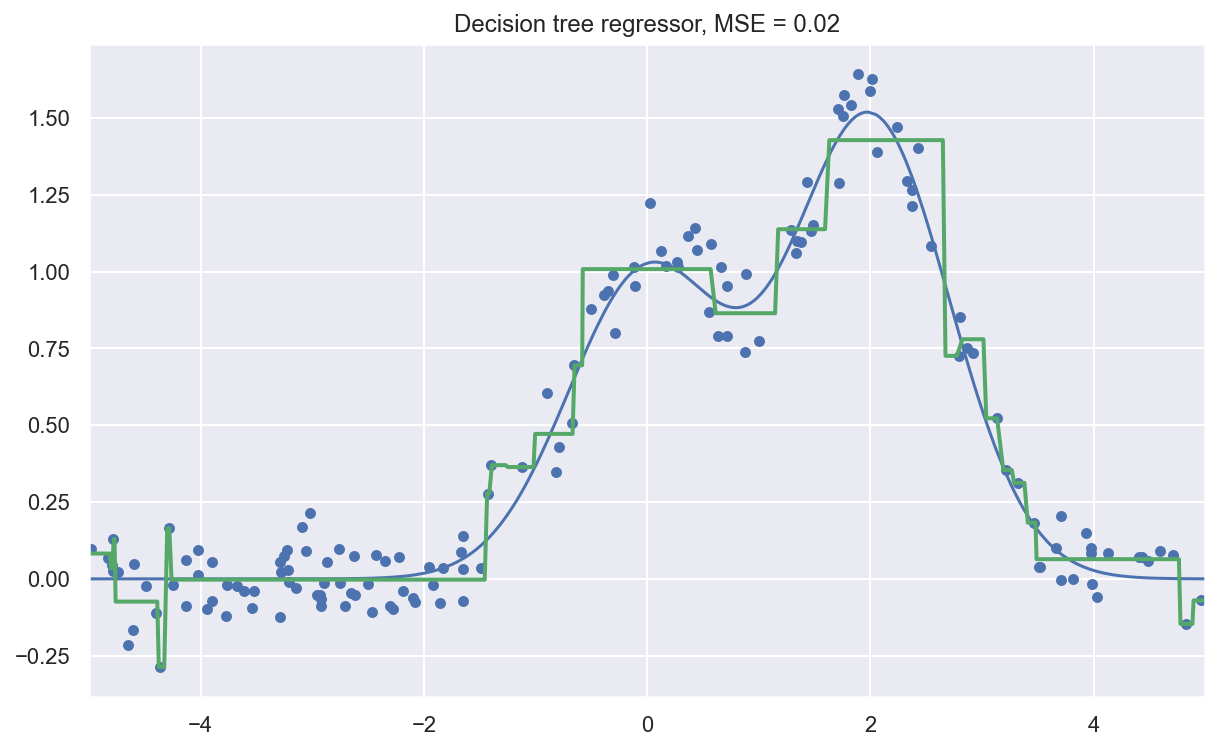

In [295]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

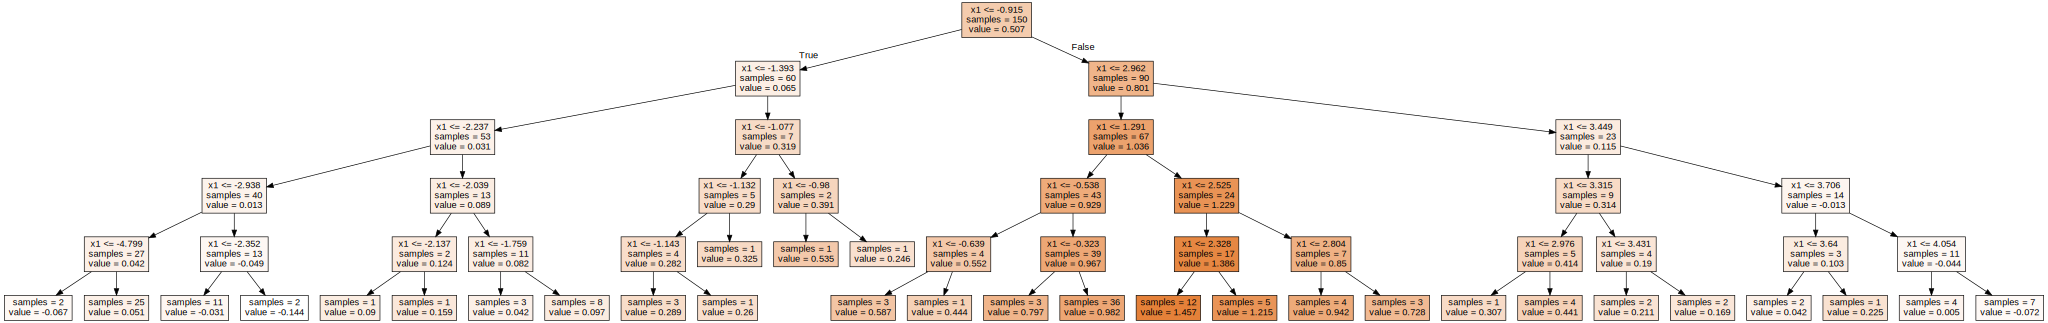

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(reg_tree, out_file="tree.dot", class_names=['output'],feature_names=['x1'], impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [63]:
# if you want to save it as image
tree_graph_to_png(
    tree=reg_tree,
    feature_names=["x1"],
    png_file_to_save="C:/datasets/topic3_decision_tree4.png",
)

In [224]:
pd.set_option('display.max_rows', 2000)

In [64]:
data1 = pd.concat([pd.DataFrame(X_train).rename(columns={0:'x1'}), pd.DataFrame(y_train).rename(columns={0:'output'})], axis=1)

In [65]:
true1 = pd.concat([pd.DataFrame(X_test).rename(columns={0:'x1'}), pd.DataFrame(y_test).rename(columns={0:'output'})], axis=1)

In [66]:
((data1['output'] - data1['output'].mean())**2).mean()

0.2718368910667577

In [70]:
# predictions of first node left leaf
((data1.loc[:59,'output'] - data1.loc[:59,'output'].mean())**2).mean()

0.018345323381754416

In [71]:
# predictions of first node right leaf
((data1.loc[60:,'output'] - data1.loc[60:,'output'].mean())**2).mean()

0.22408797351496781

In [69]:
# sum of MSEs of two leafs
((data1.loc[:59,'output'] - data1.loc[:59,'output'].mean())**2).mean() + ((data1.loc[60:,'output'] - data1.loc[60:,'output'].mean())**2).mean()

0.24243329689672222

In [75]:
data2 = data1.loc[:59]

In [85]:
((data2.loc[:52,'output'] - data2.loc[:52,'output'].mean())**2).mean()

0.009983412154382035

In [87]:
((data2.loc[53:,'output'] - data2.loc[53:,'output'].mean())**2).mean()

0.00847802815488885

In [88]:
data3 = data2.loc[53:]; data3

,x1,output
53,-1.373866,0.264340
54,-1.236245,0.292981
55,-1.144211,0.310073
56,-1.142279,0.260170
57,-1.122389,0.324758
58,-1.030932,0.535435
59,-0.929951,0.246447


In [91]:
((data3.loc[:57,'output'] - data3.loc[:57,'output'].mean())**2).mean()

0.00063342007410127

In [94]:
((data3.loc[58:,'output'] - data3.loc[58:,'output'].mean())**2).mean()

0.020878446225879203

In [96]:
data4 = data3.loc[:57]; data4

,x1,output
53,-1.373866,0.264340
54,-1.236245,0.292981
55,-1.144211,0.310073
56,-1.142279,0.260170
57,-1.122389,0.324758


In [101]:
((data4.loc[:56,'output'] - data4.loc[:56,'output'].mean())**2).mean()

0.00042425669615798035

In [102]:
((data4.loc[57,'output'] - data4.loc[57,'output'].mean())**2).mean()

0.0

In [270]:
#######################################################
#######################################################
#######################################################
#######################################################

In [103]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [104]:
train = pd.read_csv('C:/datasets/titanic/train.csv').drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [105]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
train['Sex'] = enc.fit_transform(train['Sex']);

In [106]:
train['Embarked'] = enc.fit_transform(train['Embarked'])

In [107]:
train['Age'] = train['Age'].fillna(train['Age'].median())

In [108]:
label = train['Survived']
train = train.drop('Survived', axis=1)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [110]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [111]:
data = {'model_number':[],
        'criterion': [],
        'splitter':[],
        'max_depth':[],
        'min_samples_split':[],
        'min_samples_leaf':[],
        'accuracy':[]}
  
# Create DataFrame
table_of_models = pd.DataFrame(data).astype('object'); table_of_models

,model_number,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,accuracy


In [112]:
# looking for best parameters
counter = 0
for criterion in ['gini','entropy','log_loss']:
    for splitter in ['best','random']:
        for max_depth in [10,20,30,40,None]:
            for min_samples_split in [2,3,4,5,6,7,8,9,10]:
                for min_samples_leaf in [1,2,3,4,5]:
                    tree_clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    tree_clf.fit(X_train, y_train)
                    counter += 1
                    accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
                    new_row = {'model_number':str(counter), 'criterion': criterion, 'splitter':splitter, 'max_depth':str(max_depth), 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf, 'accuracy':accuracy}
                    table_of_models = table_of_models.append(new_row, ignore_index=True)
                    

In [225]:
table_of_models.sort_values('accuracy', ascending=False)

,model_number,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,accuracy
804,805,entropy,random,30,9,5,0.865922
1300,1301,log_loss,random,40,10,1,0.860335
1250,1251,log_loss,random,30,9,1,0.860335
822,823,entropy,random,40,4,3,0.860335
1278,1279,log_loss,random,40,5,4,0.854749
356,357,gini,random,30,10,2,0.854749
382,383,gini,random,40,6,3,0.854749
438,439,gini,random,None,8,4,0.854749
84,85,gini,best,20,9,5,0.849162
79,80,gini,best,20,8,5,0.849162


In [234]:
for i in range(1000):
    tree_clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=30, min_samples_split=9, min_samples_leaf=5)
    tree_clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, tree_clf.predict(X_test))
    if accuracy > 0.8658:
        break

In [235]:
accuracy_score(y_test, tree_clf.predict(X_test))

0.8659217877094972

<AxesSubplot:xlabel='max_depth'>

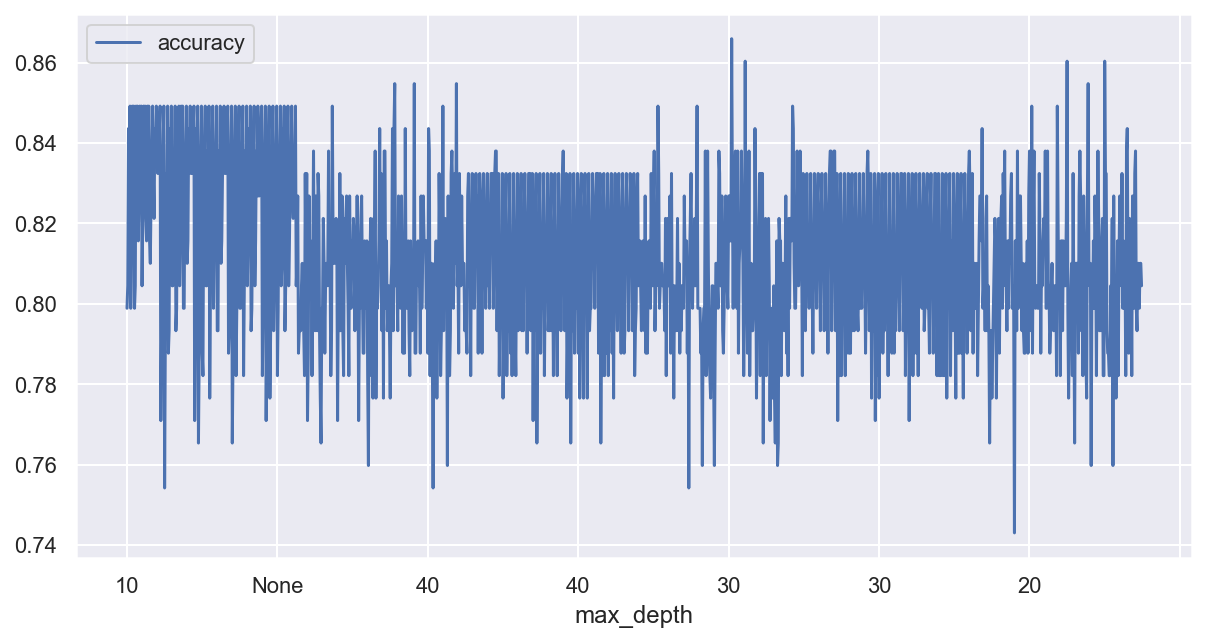

In [238]:
table_of_models.plot(x='max_depth', y='accuracy', figsize=(10,5), grid=True)

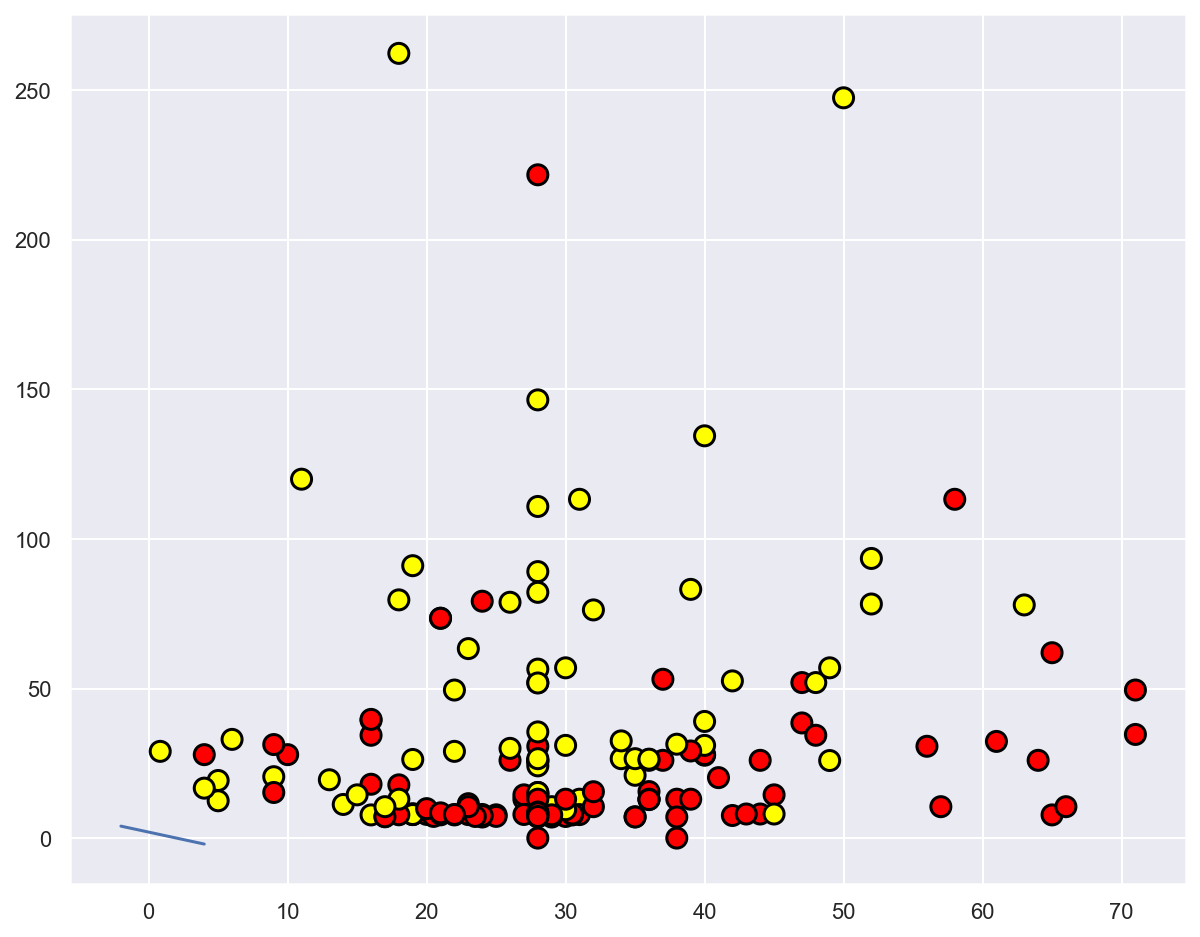

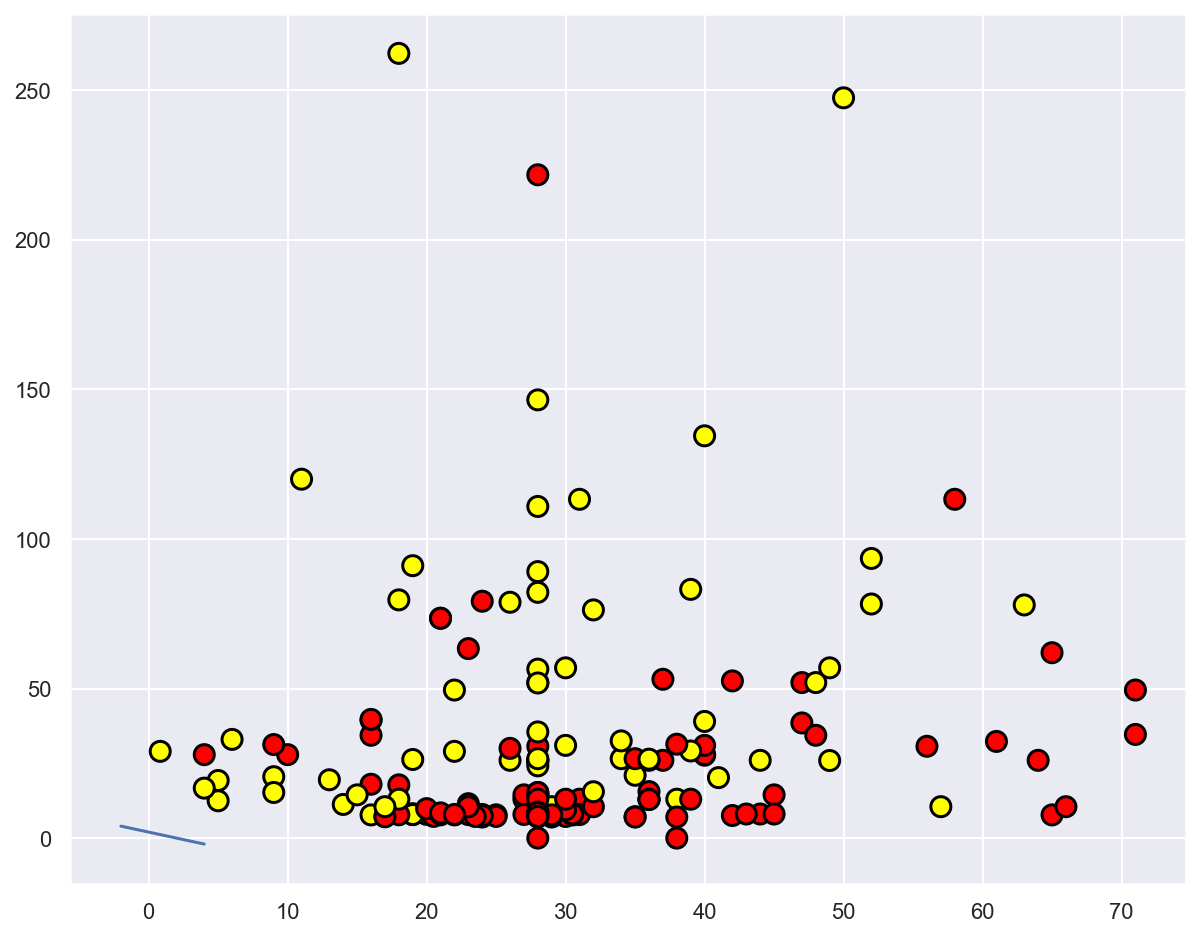

In [236]:
plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['Age'],
    X_test['Fare'],
    c=y_test,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

plt.figure(figsize=(10, 8))
plt.scatter(
    X_test['Age'],
    X_test['Fare'],
    c=tree_clf.predict(X_test),
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

In [241]:
################################################################################
################################################################################
################################################################################
################################################################################
################################################################################

In [302]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
pd.options.display.max_columns = 22
train = pd.read_csv('C:/datasets/houses_data/kc_house_data.csv').drop(['id','date','yr_renovated','zipcode','long','sqft_basement'],axis=1).loc[:2000]; train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,194000.0,3,1.50,1010,5000,1.0,0,0,3,6,1010,1943,47.4925,980,5000
1997,180000.0,3,1.00,1010,8581,1.0,0,0,4,6,1010,1920,47.3043,1060,10354
1998,465000.0,4,2.25,2340,13383,1.0,0,0,3,8,1170,1983,47.6211,1810,12532
1999,722500.0,4,2.50,2460,9296,2.0,0,0,3,9,2460,1978,47.6125,2730,9900


In [303]:
label = train['price']
train = train.drop('price',axis=1)

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)

In [333]:
data = {'model_number':[],
        'criterion': [],
        'splitter':[],
        'max_depth':[],
        'min_samples_split':[],
        'min_samples_leaf':[],
        'error':[]}
  
# Create DataFrame
table_of_models = pd.DataFrame(data).astype('object'); table_of_models

# looking for best parameters
counter = 0
for criterion in ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']:
    for splitter in ['best','random']:
        for max_depth in [10,20,30,40,None]:
            for min_samples_split in [2,3,4,5,6,7,8,9,10]:
                for min_samples_leaf in [1,2,3,4,5]:
                    tree_reg = DecisionTreeRegressor(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
                    tree_reg.fit(X_train, y_train)
                    counter += 1
                    error = mean_absolute_percentage_error(y_test, tree_reg.predict(X_test))
                    new_row = {'model_number':str(counter), 'criterion': criterion, 'splitter':splitter, 'max_depth':str(max_depth), 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf, 'error':error}
                    table_of_models = table_of_models.append(new_row, ignore_index=True)
                    

In [334]:
table_of_models.sort_values('error', ascending=True)

,model_number,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,error
1144,1145,absolute_error,random,10,5,5,0.190680
308,309,squared_error,random,20,9,4,0.190848
1157,1158,absolute_error,random,10,8,3,0.192841
1127,1128,absolute_error,random,10,2,3,0.193518
1152,1153,absolute_error,random,10,7,3,0.193535
1149,1150,absolute_error,random,10,6,5,0.193604
919,920,absolute_error,best,10,5,5,0.195302
939,940,absolute_error,best,10,9,5,0.195354
934,935,absolute_error,best,10,8,5,0.195535
924,925,absolute_error,best,10,6,5,0.195626


In [339]:
for i in range(1000):
    tree_reg = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_depth=30, min_samples_split=3, min_samples_leaf=1)
    tree_reg.fit(X_train, y_train)
    error = mean_absolute_percentage_error(y_test, tree_reg.predict(X_test))
    if error > 0.29:
        break

In [ ]:
for i in range(1000):
    tree_reg = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=20, min_samples_split=3, min_samples_leaf=4)
    tree_reg.fit(X_train, y_train)
    error = mean_absolute_percentage_error(y_test, tree_reg.predict(X_test))
    if error < 0.186:
        break

In [323]:
predictions = pd.concat((X_test['sqft_living'].reset_index().drop('index',axis=1), pd.DataFrame(y_test).reset_index().drop('index',axis=1), pd.Series(tree_reg.predict(X_test))),axis=1).rename(columns={0:'predicted_price'}); predictions

,sqft_living,price,predicted_price
0,2403,519900.0,609850.0
1,990,437500.0,420000.0
2,1550,805000.0,707500.0
3,1654,314950.0,267500.0
4,2470,350000.0,283500.0
5,2300,320000.0,429000.0
6,1580,350000.0,569000.0
7,4280,1928000.0,986500.0
8,2770,317625.0,470000.0
9,2040,499000.0,419000.0


In [324]:
mean_absolute_percentage_error(predictions['price'], predictions['predicted_price'])

0.1836403230618232

<AxesSubplot:xlabel='sqft_living', ylabel='predicted_price'>

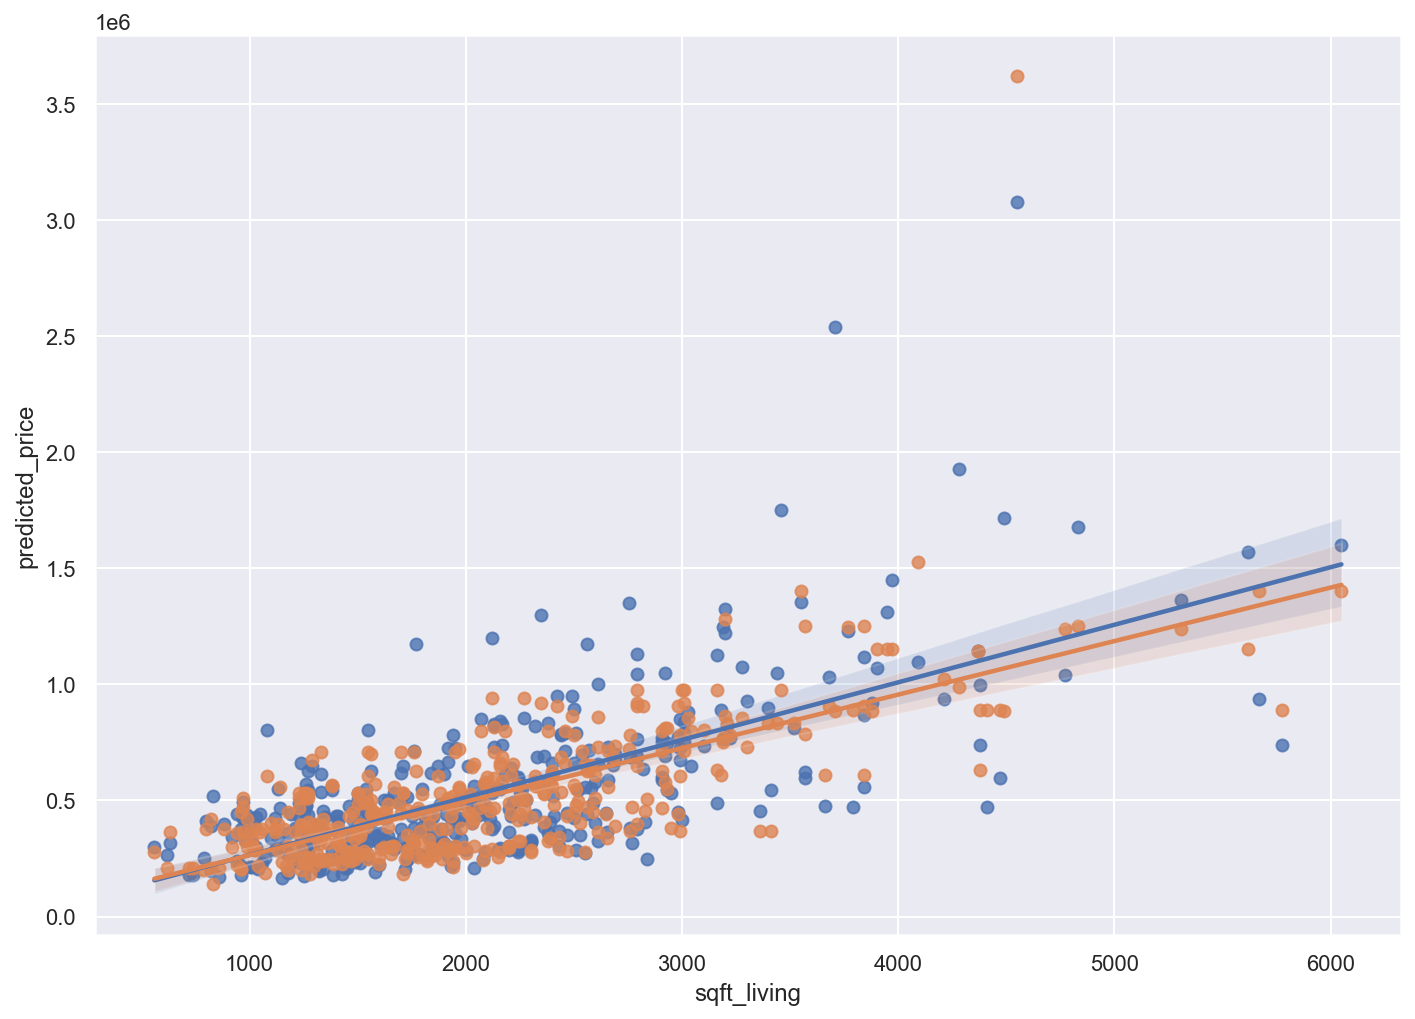

In [331]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x=predictions['sqft_living'], y=predictions['price'])
sns.regplot(x=predictions['sqft_living'], y=predictions['predicted_price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

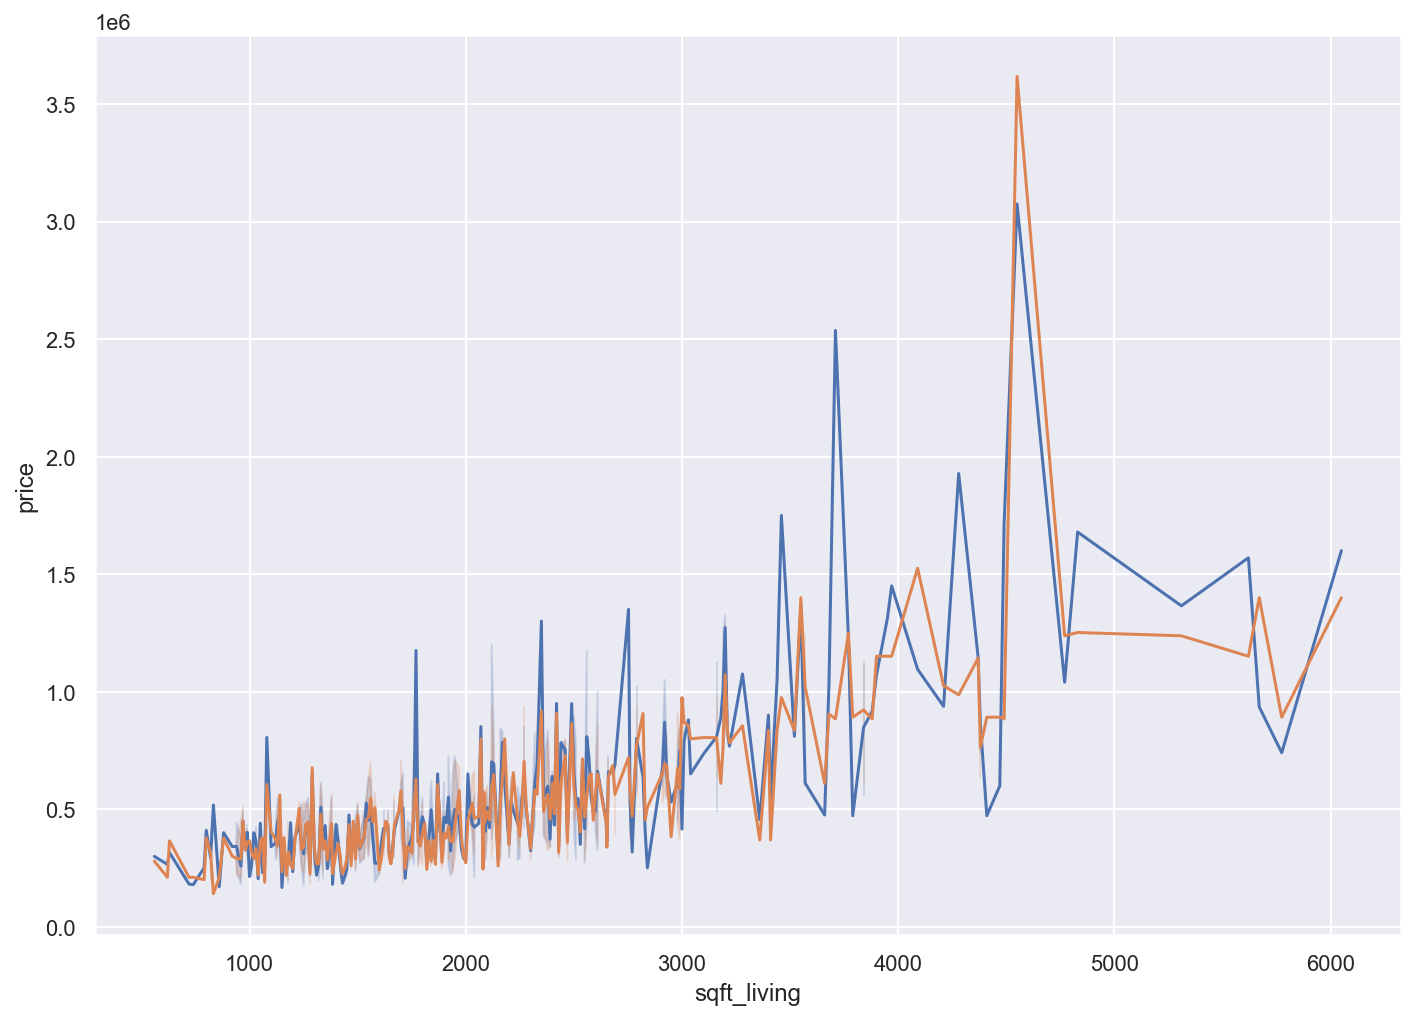

In [332]:
sns.lineplot(x=predictions['sqft_living'], y=predictions['price'])
sns.lineplot(x=predictions['sqft_living'], y=predictions['predicted_price'])

<AxesSubplot:xlabel='sqft_living', ylabel='predicted_price'>

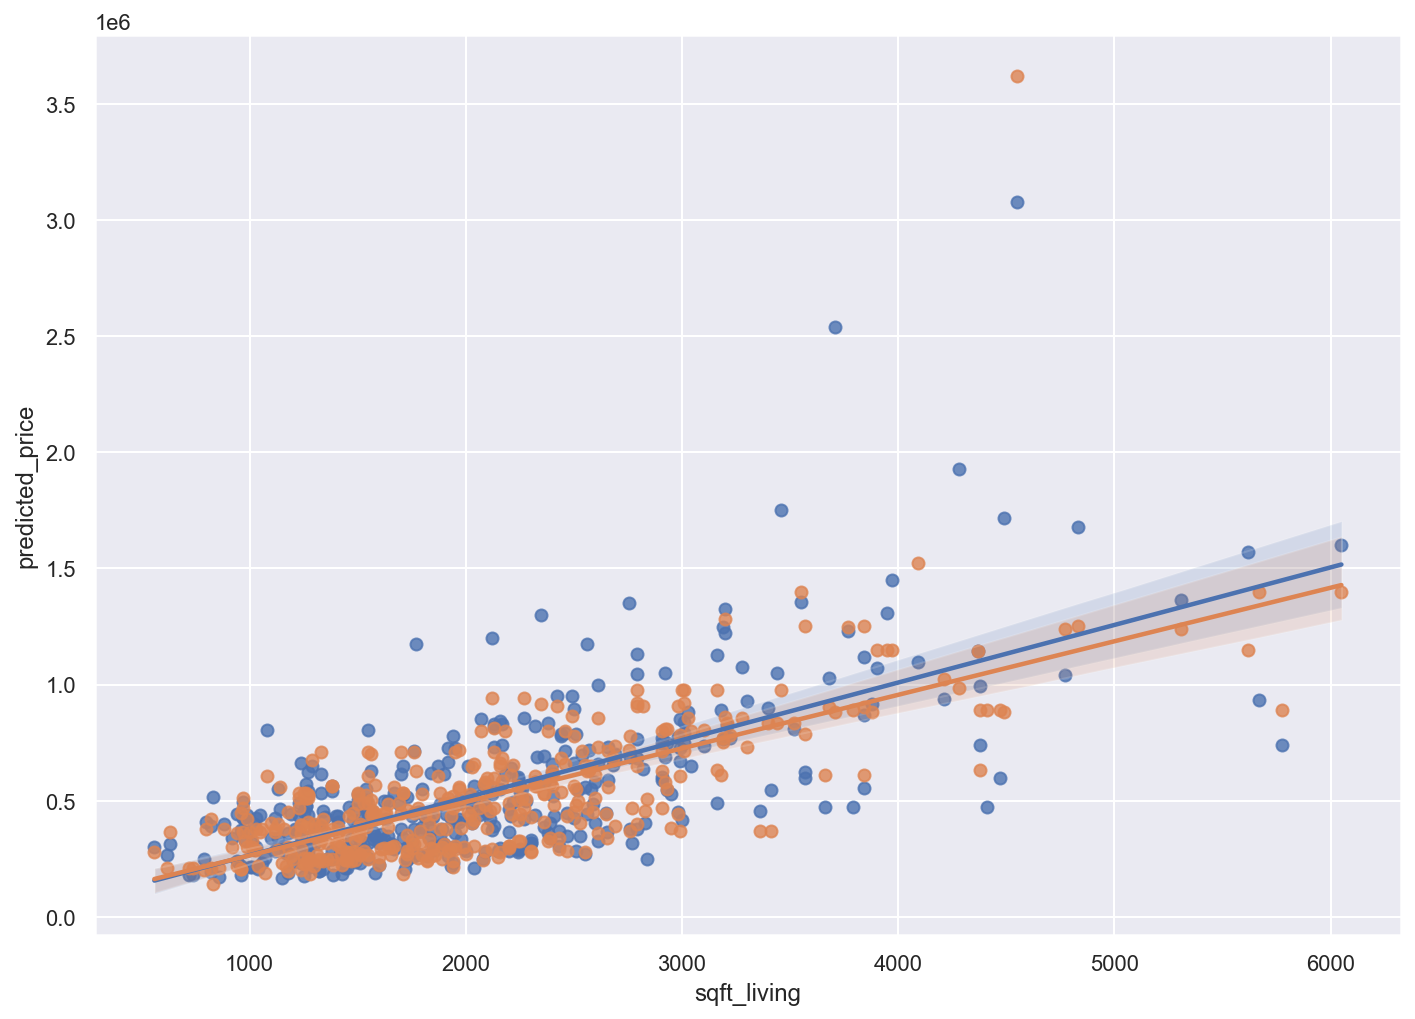

In [343]:
sns.regplot(x=predictions['sqft_living'], y=predictions['price'])
sns.regplot(x=predictions['sqft_living'], y=predictions['predicted_price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

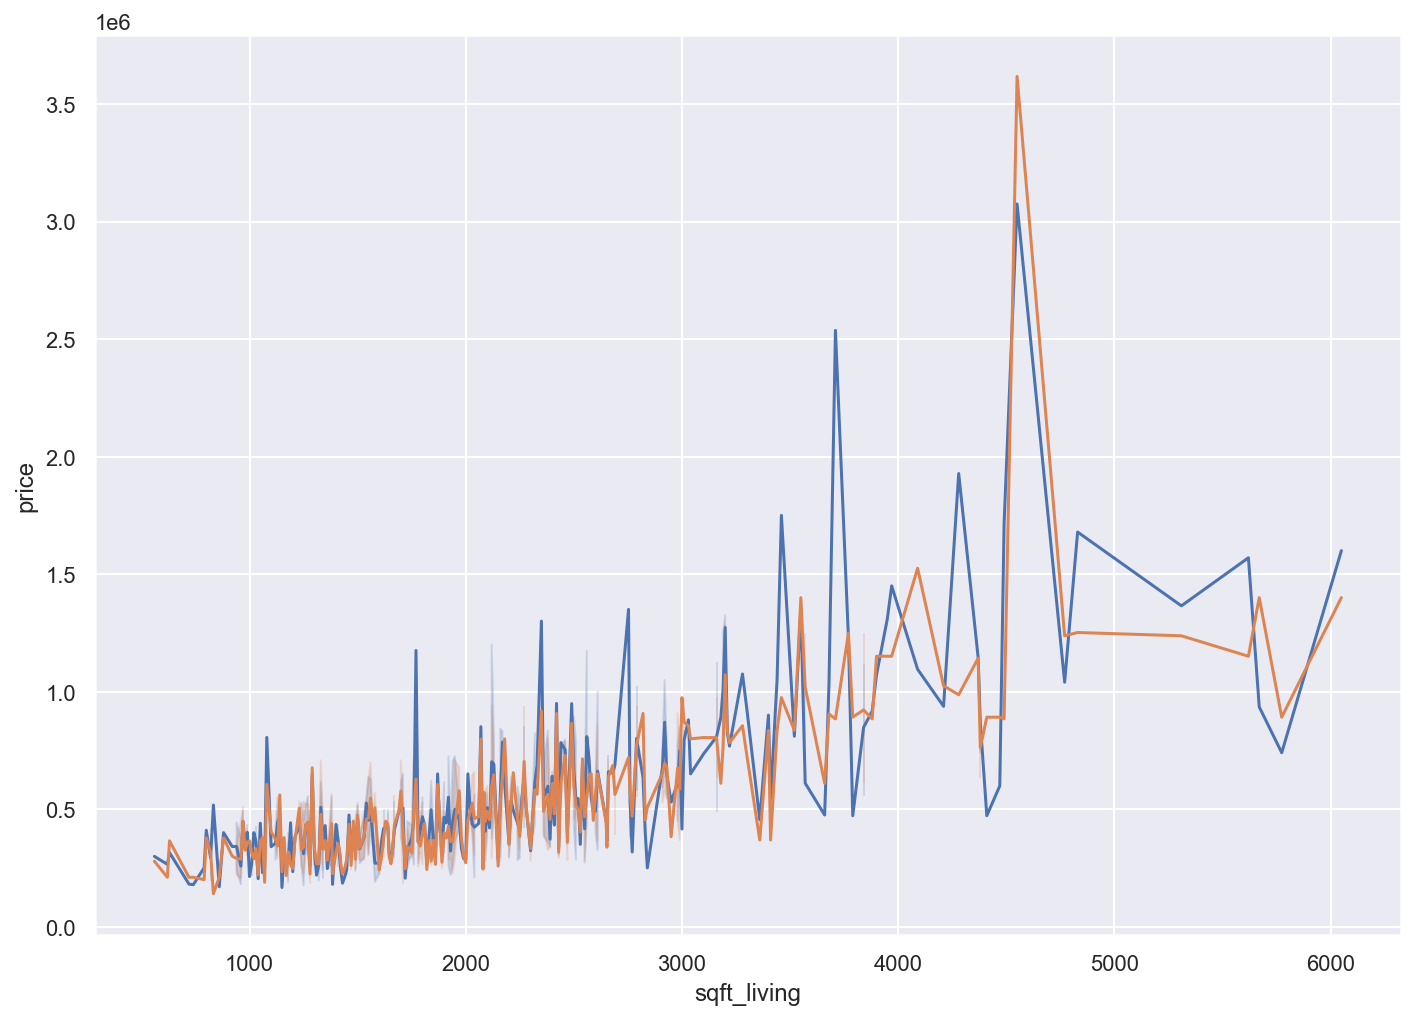

In [342]:
sns.lineplot(x=predictions['sqft_living'], y=predictions['price'])
sns.lineplot(x=predictions['sqft_living'], y=predictions['predicted_price'])